<a href="https://colab.research.google.com/github/gtmray/Logistic-Regression-using-Numpy/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 10)
sns.set()
plt.style.use('ggplot')

In [93]:
cols = ["Pregnancies" ,"Glucose" ,"BloodPressure" ,"SkinThickness" ,"Insulin" ,"BMI" ,"DiabetesPedigreeFunction" ,"Age" ,"Outcome"]
url = "https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv"
df = pd.read_csv(url, skiprows=9, names=cols)

In [94]:
target_col = 'Outcome'
X = df.drop(target_col, axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Number of Epochs:  0  Cost:  0.6931471805599454
Number of Epochs:  1000  Cost:  0.602665896544678
Number of Epochs:  2000  Cost:  0.5574622693344498
Number of Epochs:  3000  Cost:  0.5316524123416859
Number of Epochs:  4000  Cost:  0.5153530033439773
Number of Epochs:  5000  Cost:  0.5043098521188911
Number of Epochs:  6000  Cost:  0.49644883048146066
Number of Epochs:  7000  Cost:  0.49064981001909386
Number of Epochs:  8000  Cost:  0.48625686758838904
Number of Epochs:  9000  Cost:  0.48286062859518
Number of Epochs:  10000  Cost:  0.48019241649433736
Number of Epochs:  11000  Cost:  0.47806871828427977
Number of Epochs:  12000  Cost:  0.476360121012311
Number of Epochs:  13000  Cost:  0.4749729690992532
Number of Epochs:  14000  Cost:  0.4738380258739079


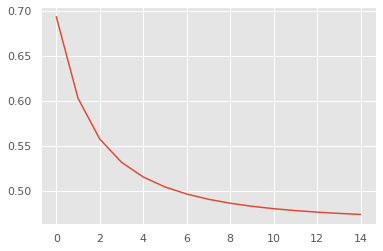

--------------------------------------------------------------------------
***********MY MODEL ACCURACY SCORE ON TEST DATA:  0.7532467532467533 ***************
--------------------------------------------------------------------------


In [95]:
class LogisticRegressionRAY:
    def __init__(self, learning_rate=0.01, epochs=1000, verbose=False, plot_loss=False):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.verbose = verbose
      self.plot_loss = plot_loss
      self.w = None
      self.b = None
    
      self.cost_per_iteration = []

    def sigmoid(self, z):
      return 1/(1+np.exp(-z))

    def loss(self, a, Y, m):
      return (-1/m)*np.sum(Y*np.log(a) + (1-Y)*np.log(1-a))
   
    def fit(self, X, Y):
      m, n = X.shape
      #Forward propagatoin
      self.w = np.zeros(n)
      self.b = 0

      for i in range(self.epochs):
        z = np.dot(X, self.w) + self.b
        a = self.sigmoid(z)
        cost = self.loss(a, Y, m)

        if i%1000 == 0 and self.verbose==True:
          self.cost_per_iteration.append(cost)
          print("Number of Epochs: ",i," Cost: ",cost)
        
        #Backpropagation
        dw = (np.dot(X.T, (a - Y)))/m #gradient of weight
        db = (np.sum(a - Y)).mean()/m #gradient of bias
        
        #Updating weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, X):
        Z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(Z)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_hat]
        return y_predicted_cls

    
    def score(self, X, Y):
      z = np.dot(X, self.w) + self.b
      y_hat = self.sigmoid(z)
      if self.plot_loss:
        plt.plot(self.cost_per_iteration)
        plt.show()
      return (y_hat.round()==Y).mean()
    
model = LogisticRegressionRAY(learning_rate=0.001, epochs=15000, verbose=True, plot_loss=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("--------------------------------------------------------------------------")
print("***********MY MODEL ACCURACY SCORE ON TEST DATA: ",score, "********")
print("--------------------------------------------------------------------------")

ROC SCORE:  0.7313131313131312


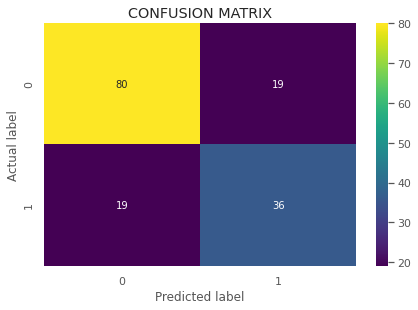

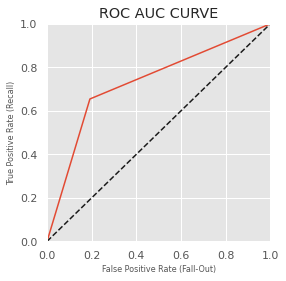

In [96]:
def plot_confusion_matrix(y, y_hat):
  confuse = confusion_matrix(y, y_hat)    
  sns.heatmap(pd.DataFrame(confuse), annot=True, cmap='viridis', fmt='g')
  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')
  plt.title('CONFUSION MATRIX')
  plt.show()

def performance_metrics(y, y_pred):

  all = y.size
  confuse = confusion_matrix(y, y_pred)
  tp, fp, fn, tn = confuse.ravel()
  precision = tp/(tp+fp)
  tpr = recall = tp/(tp+fn)
  f1_score = (2*precision*recall)/(precision+recall)
  fpr = fp/(fp+tn)
  return fpr, tpr, f1_score

def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--') #Threshold of the line
    plt.axis([0, 1, 0, 1]) #Reduces extra spaces
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=8)
    plt.ylabel('True Positive Rate (Recall)', fontsize=8)
    plt.title('ROC AUC CURVE')
    plt.show()

roc_score = roc_auc_score(y_test, y_pred)
print("ROC SCORE: ", roc_score)

plot_confusion_matrix(y_test, y_pred)
fpr, tpr, thresholdsh = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)
# fpr, tpr, f1 = performance_metrics(y_test, y_pred) 
# print("False positive rate: {:.2f}, True positive rate: {:.2f}, F1 SCORE: {:.2f}".format(fpr, tpr, f1)) 
